In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

READING THE DATASET

In [3]:
df = pd.read_csv("Battery_RUL.csv")

FEATURE SCALING

In [11]:

scaler_1 = MinMaxScaler()
scaler_2 = MinMaxScaler()
columns_to_scale = df.columns
df[columns_to_scale] = scaler_1.fit_transform(df[columns_to_scale])

In [8]:
corr_matrix=df.corr()
corr_matrix['RUL'].sort_values(ascending=False)

RUL                          1.000000
Max. Voltage Dischar. (V)    0.783367
Time at 4.15V (s)            0.176506
Time constant current (s)    0.040671
Charging time (s)            0.018297
Decrement 3.6-3.4V (s)       0.012002
Discharge Time (s)           0.011956
Min. Voltage Charg. (V)     -0.759716
Cycle_Index                 -0.999756
Name: RUL, dtype: float64

CORRELATION HEATMAP

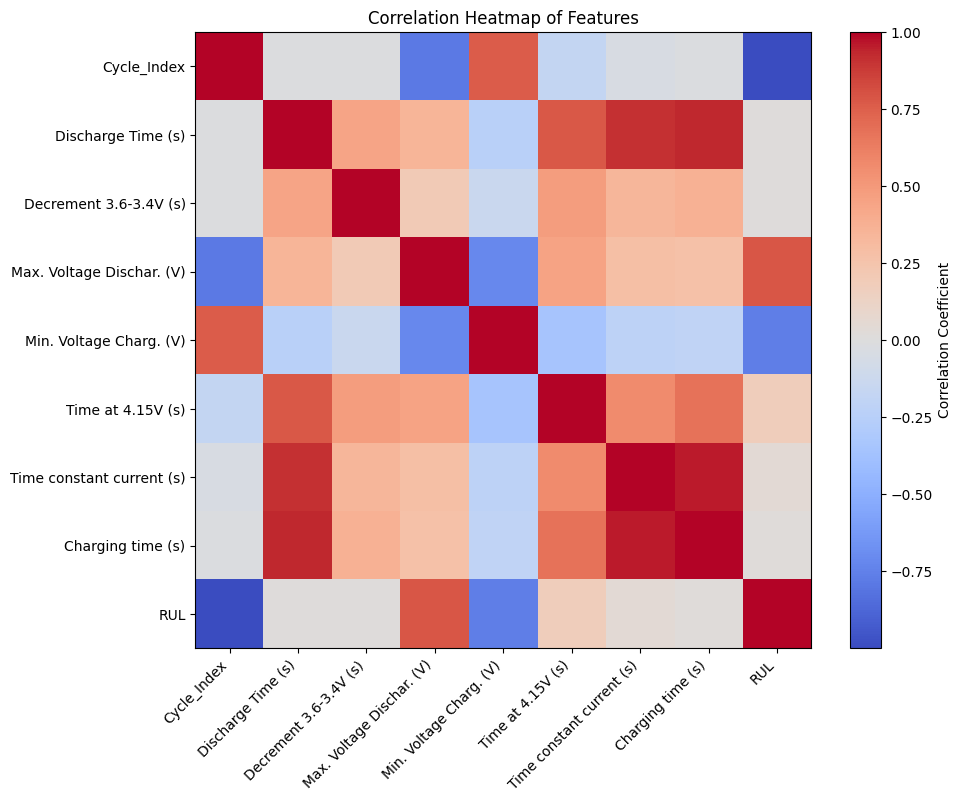

In [5]:
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(corr_matrix, cmap="coolwarm")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha="right")
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Correlation Heatmap of Features")
plt.show()

In [6]:
sequence_length = 100  
sequences = []
labels = []
for i in range(len(df) - sequence_length):
    seq = df.iloc[i:i+sequence_length].values
    label = df.iloc[i+sequence_length]['RUL']
    sequences.append(seq)
    labels.append(label)
sequences
X = np.array(sequences)
y = np.array(labels)

TRAIN-TEST SPLITTING

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CONVO-LSTM MODEL

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length,9)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=[RootMeanSquaredError()])
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25

337/337 [==============================] - 21s 55ms/step - loss: 0.0071 - root_mean_squared_error: 0.0841 - val_loss: 5.7845e-04 - val_root_mean_squared_error: 0.0241
Epoch 2/25
337/337 [==============================] - 18s 53ms/step - loss: 3.3001e-04 - root_mean_squared_error: 0.0182 - val_loss: 8.7017e-05 - val_root_mean_squared_error: 0.0093
Epoch 3/25
337/337 [==============================] - 18s 53ms/step - loss: 1.1875e-04 - root_mean_squared_error: 0.0109 - val_loss: 8.5817e-05 - val_root_mean_squared_error: 0.0093
Epoch 4/25
337/337 [==============================] - 18s 53ms/step - loss: 1.1085e-04 - root_mean_squared_error: 0.0105 - val_loss: 3.0313e-04 - val_root_mean_squared_error: 0.0174
Epoch 5/25
337/337 [==============================] - 18s 53ms/step - loss: 7.1325e-05 - root_mean_squared_error: 0.0084 - val_loss: 2.0971e-04 - val_root_mean_squared_error: 0.0145
Epoch 6/25
337/337 [==============================] - 18s 53ms/step - loss: 1.0110e-04 - roo

TESTING THE MODEL

94/94 [==============================] - 2s 19ms/step - loss: 6.2342e-06 - root_mean_squared_error: 0.0025
Test Loss: [6.234190095710801e-06, 0.002496836008504033]
94/94 [==============================] - 2s 19ms/step
[[0.582737  ]
 [0.83363074]
 [0.58516055]
 [0.46004498]
 [0.7631751 ]]
[0.58252427 0.83230362 0.58517211 0.46425419 0.76345984]


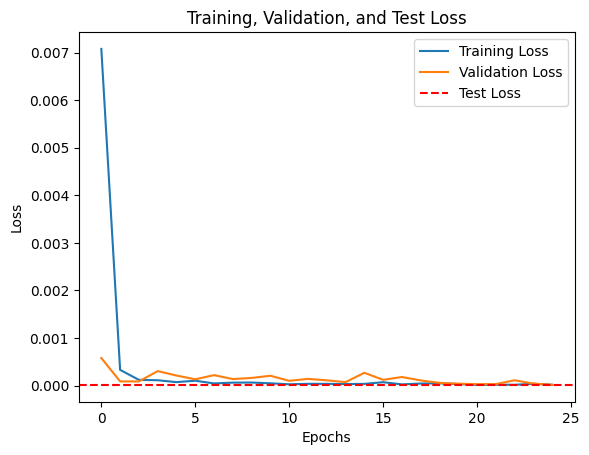

In [9]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test)
print(predictions[:5])
print(y_test[:5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=loss[0], color='r', linestyle='--', label='Test Loss')  # Add a line for test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

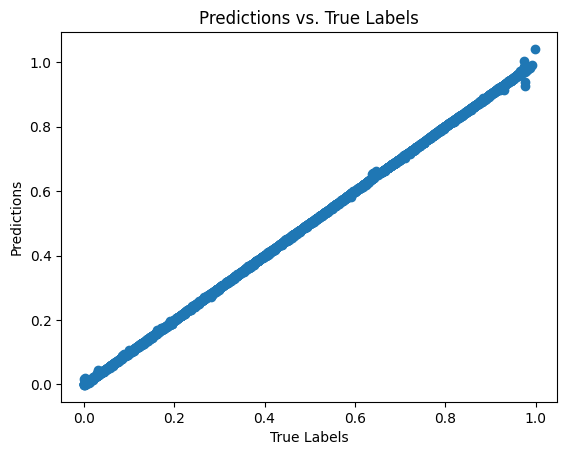

In [10]:
plt.scatter(y_test, predictions)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Labels')
plt.show()

USING SGD OPTIMIZER

In [11]:
from keras.optimizers import SGD
optimizer = SGD(learning_rate=0.001, momentum=0.9,nesterov=True)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length,9)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=[RootMeanSquaredError()])
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
337/337 [==============================] - 21s 55ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 2/25
337/337 [==============================] - 18s 52ms/step - loss: 0.0037 - root_mean_squared_error: 0.0608 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0599
Epoch 3/25
337/337 [==============================] - 17s 51ms/step - loss: 0.0034 - root_mean_squared_error: 0.0587 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0580
Epoch 4/25
337/337 [==============================] - 18s 54ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0565
Epoch 5/25
337/337 [==============================] - 18s 52ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0553
Epoch 6/25
337/337 [==============================] - 18s 52ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552 - val_loss: 0

94/94 [==============================] - 2s 19ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400
Test Loss: [0.0015962194884195924, 0.03995271399617195]
94/94 [==============================] - 2s 18ms/step
[[0.58533704]
 [0.82341695]
 [0.5881729 ]
 [0.45667177]
 [0.76237106]]
[0.58252427 0.83230362 0.58517211 0.46425419 0.76345984]


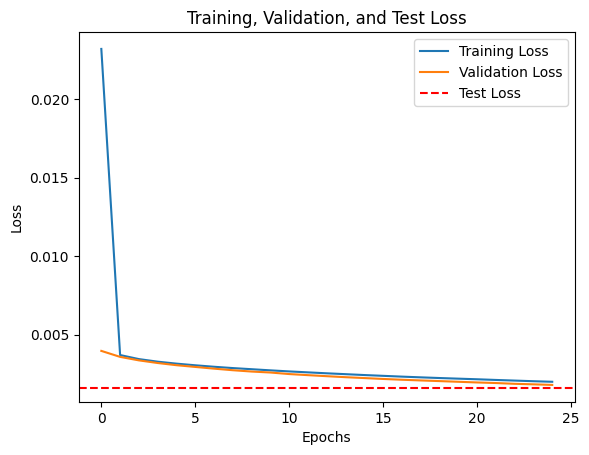

In [12]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test)
print(predictions[:5])
print(y_test[:5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=loss[0], color='r', linestyle='--', label='Test Loss')  # Add a line for test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

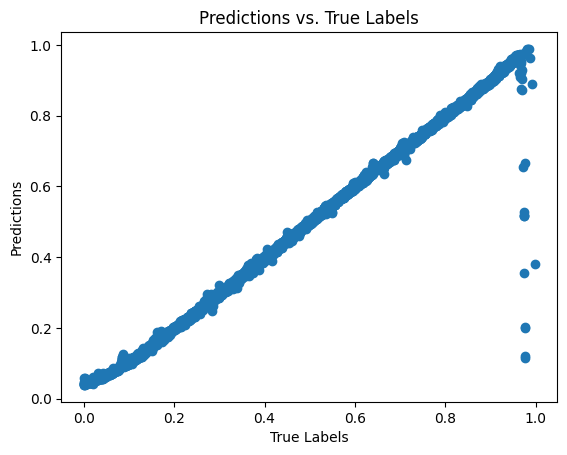

In [13]:
plt.scatter(y_test, predictions)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Labels')
plt.show()

USING RMSPROP OPTIMIZER

In [14]:
from keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.001)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length,9)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=[RootMeanSquaredError()])
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
337/337 [==============================] - 20s 53ms/step - loss: 0.0056 - root_mean_squared_error: 0.0747 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0678
Epoch 2/25
337/337 [==============================] - 18s 53ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0400
Epoch 3/25
337/337 [==============================] - 18s 53ms/step - loss: 9.1616e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 4/25
337/337 [==============================] - 18s 53ms/step - loss: 6.4413e-04 - root_mean_squared_error: 0.0254 - val_loss: 6.1850e-04 - val_root_mean_squared_error: 0.0249
Epoch 5/25
337/337 [==============================] - 18s 53ms/step - loss: 4.7813e-04 - root_mean_squared_error: 0.0219 - val_loss: 8.1139e-04 - val_root_mean_squared_error: 0.0285
Epoch 6/25
337/337 [==============================] - 18s 53ms/step - loss: 3.9118e-04 - root_mean_squared_err

94/94 [==============================] - 2s 17ms/step - loss: 1.9755e-05 - root_mean_squared_error: 0.0044
Test Loss: [1.975521990971174e-05, 0.0044446843676269054]
94/94 [==============================] - 2s 16ms/step
[[0.58302325]
 [0.83284795]
 [0.58563936]
 [0.45506585]
 [0.7628919 ]]
[0.58252427 0.83230362 0.58517211 0.46425419 0.76345984]


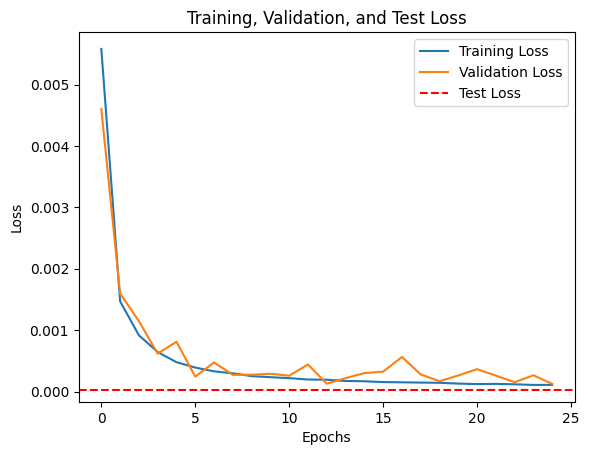

In [15]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test)
print(predictions[:5])
print(y_test[:5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=loss[0], color='r', linestyle='--', label='Test Loss')  # Add a line for test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

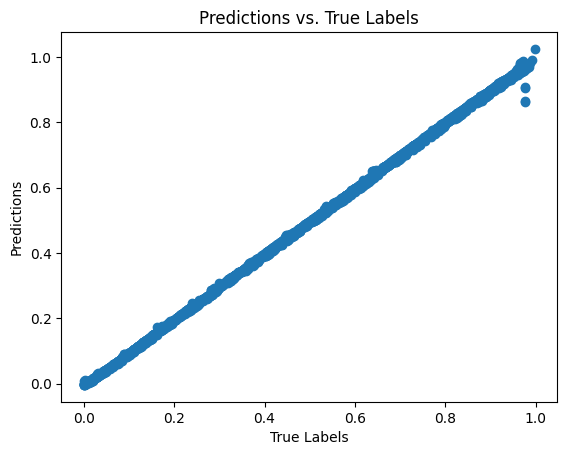

In [19]:
plt.scatter(y_test, predictions)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Labels')
plt.show()

USING ADAGRAD OPTIMIZER

In [16]:
from keras.optimizers import Adagrad
optimizer = Adagrad(learning_rate=0.001)
# initial_accumulator_value=0.01, epsilon=1e-07
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length,9)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=[RootMeanSquaredError()])
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
337/337 [==============================] - 18s 48ms/step - loss: 0.0502 - root_mean_squared_error: 0.2241 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0994
Epoch 2/25
337/337 [==============================] - 16s 47ms/step - loss: 0.0059 - root_mean_squared_error: 0.0767 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0665
Epoch 3/25
337/337 [==============================] - 15s 45ms/step - loss: 0.0041 - root_mean_squared_error: 0.0638 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 4/25
337/337 [==============================] - 18s 52ms/step - loss: 0.0038 - root_mean_squared_error: 0.0619 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0619
Epoch 5/25
337/337 [==============================] - 18s 52ms/step - loss: 0.0037 - root_mean_squared_error: 0.0608 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0609
Epoch 6/25
337/337 [==============================] - 17s 51ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0

94/94 [==============================] - 1s 10ms/step - loss: 0.0037 - mae: 0.0211
Test Loss: [0.003683221060782671, 0.02105705440044403]
94/94 [==============================] - 1s 10ms/step
[[0.5958351]
 [0.8279687]
 [0.6005951]
 [0.4601119]
 [0.7717269]]
[0.58252427 0.83230362 0.58517211 0.46425419 0.76345984]


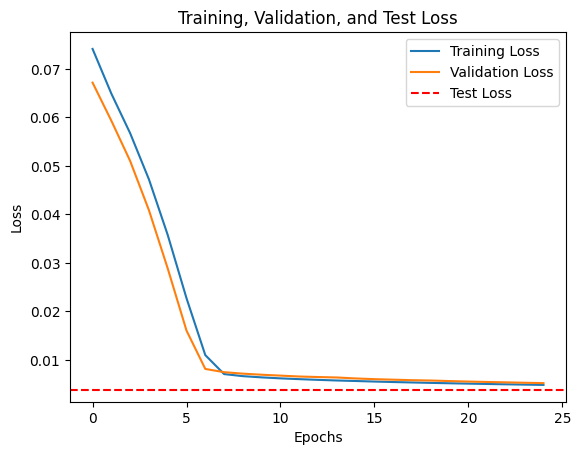

In [21]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test)
print(predictions[:5])
print(y_test[:5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=loss[0], color='r', linestyle='--', label='Test Loss')  # Add a line for test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

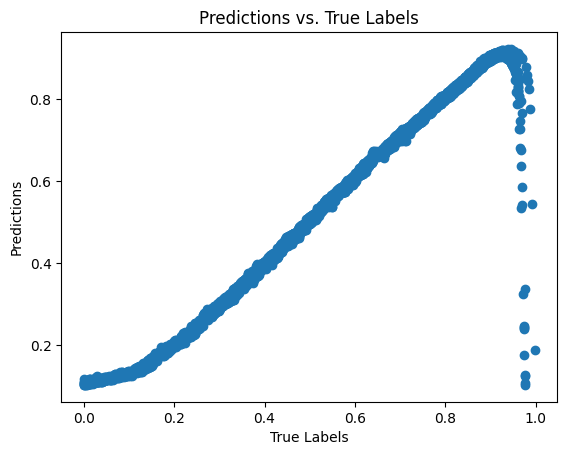

In [22]:
plt.scatter(y_test, predictions)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Labels')
plt.show()